# To predict the likelihood of a liable customer buying personal loans

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from os import system

# Reading the csv file and loading the data

In [2]:
tbData=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

# Viewing the shape of the dataset 

In [3]:
tbData.shape


(5000, 14)

# Exploring the dataset

In [4]:
tbData.head(10)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


# Checking for missing values in the dataset

In [5]:
tbData.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
tbData.isnull().values.any()

False

In [7]:
tbData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB



# Checking the correlation between features

In [8]:
tbData.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


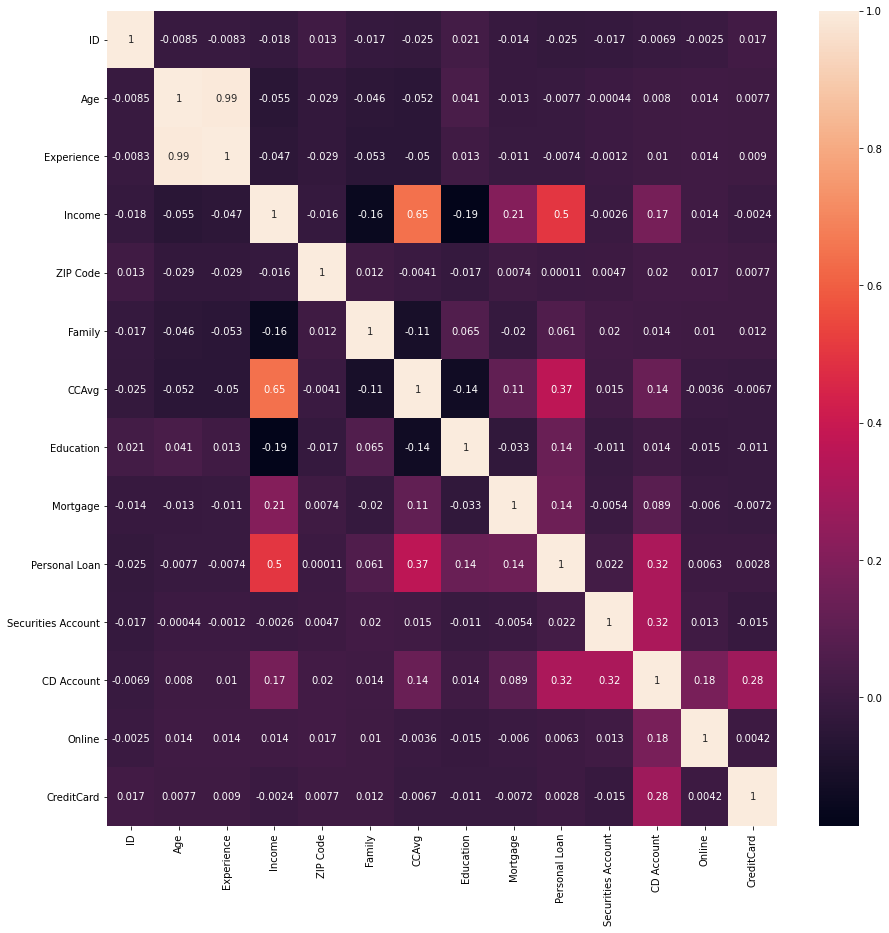

In [9]:
tbdatacorr=tbData.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(tbdatacorr,annot=True,ax=ax)

# Feature elimination

In [10]:
tbData1=tbData.drop(['ID','Age','ZIP Code','Securities Account','Online','CreditCard'],axis=1)
tbData1.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,1,49,4,1.6,1,0,0,0
1,19,34,3,1.5,1,0,0,0
2,15,11,1,1.0,1,0,0,0
3,9,100,1,2.7,2,0,0,0
4,8,45,4,1.0,2,0,0,0


# Checking for duplicate data 

In [11]:
duplicate=tbData1.duplicated()
print(duplicate.sum())
tbData1[duplicate]

64


,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
541,6,141,2,4.33,1,0,0,0
565,29,79,3,0.80,1,0,0,0
668,41,18,3,0.50,1,0,0,0
799,3,39,4,2.10,3,0,0,0
1026,4,43,3,0.10,2,0,0,0
...,...,...,...,...,...,...,...,...
4728,35,31,3,0.40,2,0,0,0
4744,20,72,3,0.30,3,0,0,0
4746,7,18,1,0.40,3,0,0,0
4934,0,85,2,1.60,3,0,0,0


In [12]:
tbData1.drop_duplicates(inplace=True)

In [13]:
dup=tbData1.duplicated()
print(dup.sum())


0


# Bivariate analysis : Histogram

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AB3856F10>,
      dtype=object)

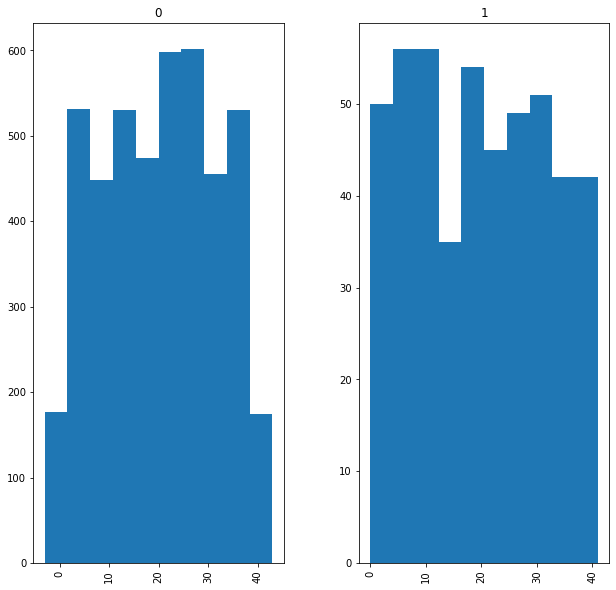

In [14]:
tbData.hist(by='Personal Loan',column = 'Experience',figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AB3926940>,
      dtype=object)

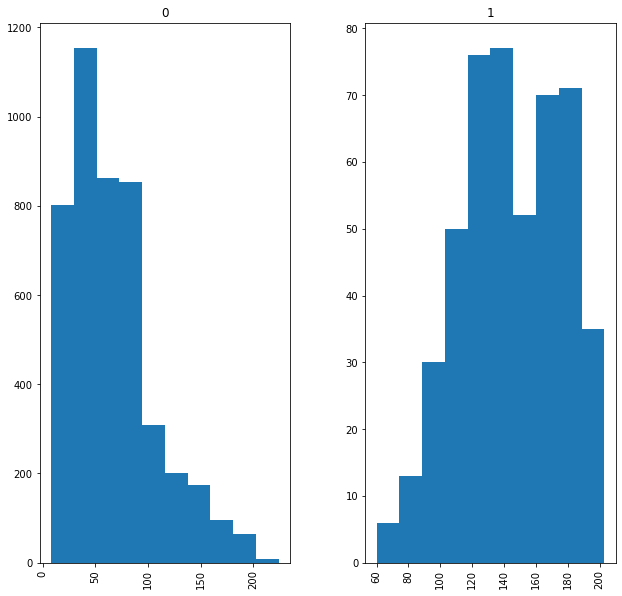

In [15]:
tbData.hist(by='Personal Loan',column = 'Income',figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AB39CF430>,
      dtype=object)

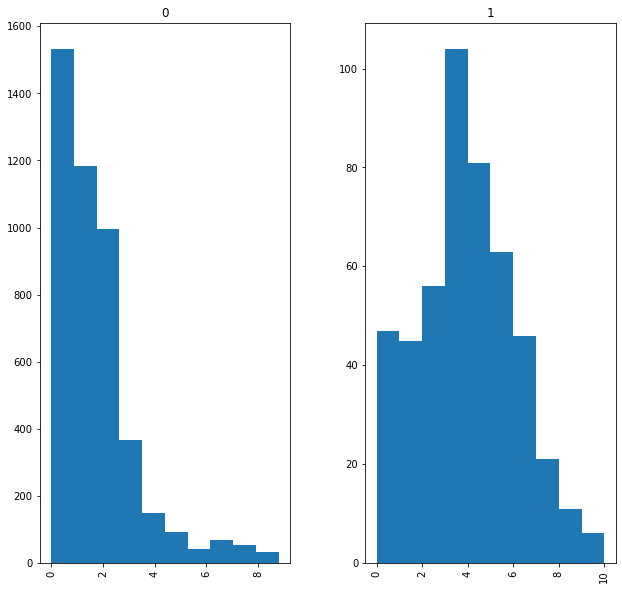

In [16]:
tbData.hist(by='Personal Loan',column = 'CCAvg',figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AB3A765B0>,
      dtype=object)

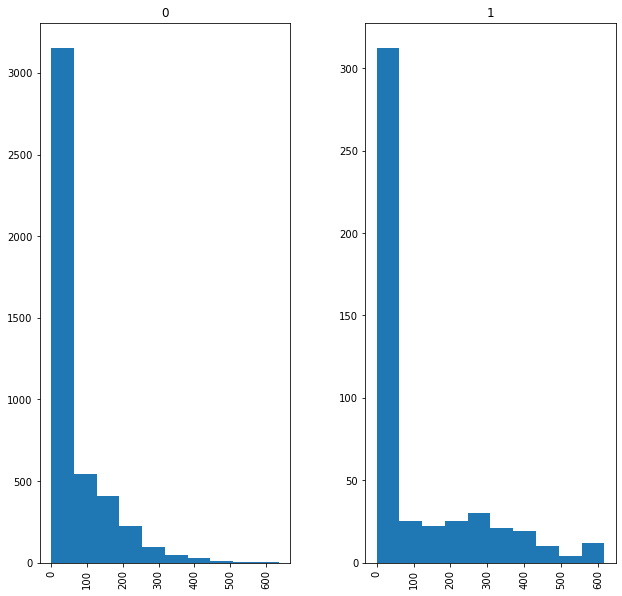

In [17]:
tbData.hist(by='Personal Loan',column = 'Mortgage',figsize=(10,10))

# Scatterplot 

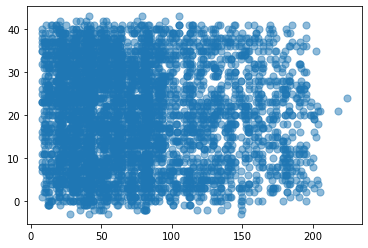

In [18]:
plt.scatter(tbData1['Income'], tbData1['Experience'], s=50, alpha=0.5)
plt.show()

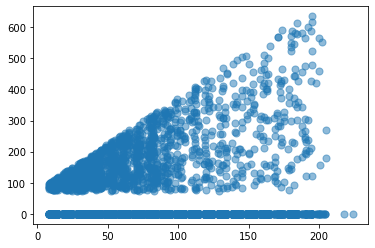

In [19]:
plt.scatter(tbData1['Income'], tbData1['Mortgage'],s=50,alpha=0.5)
plt.show()

# Pairplot 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


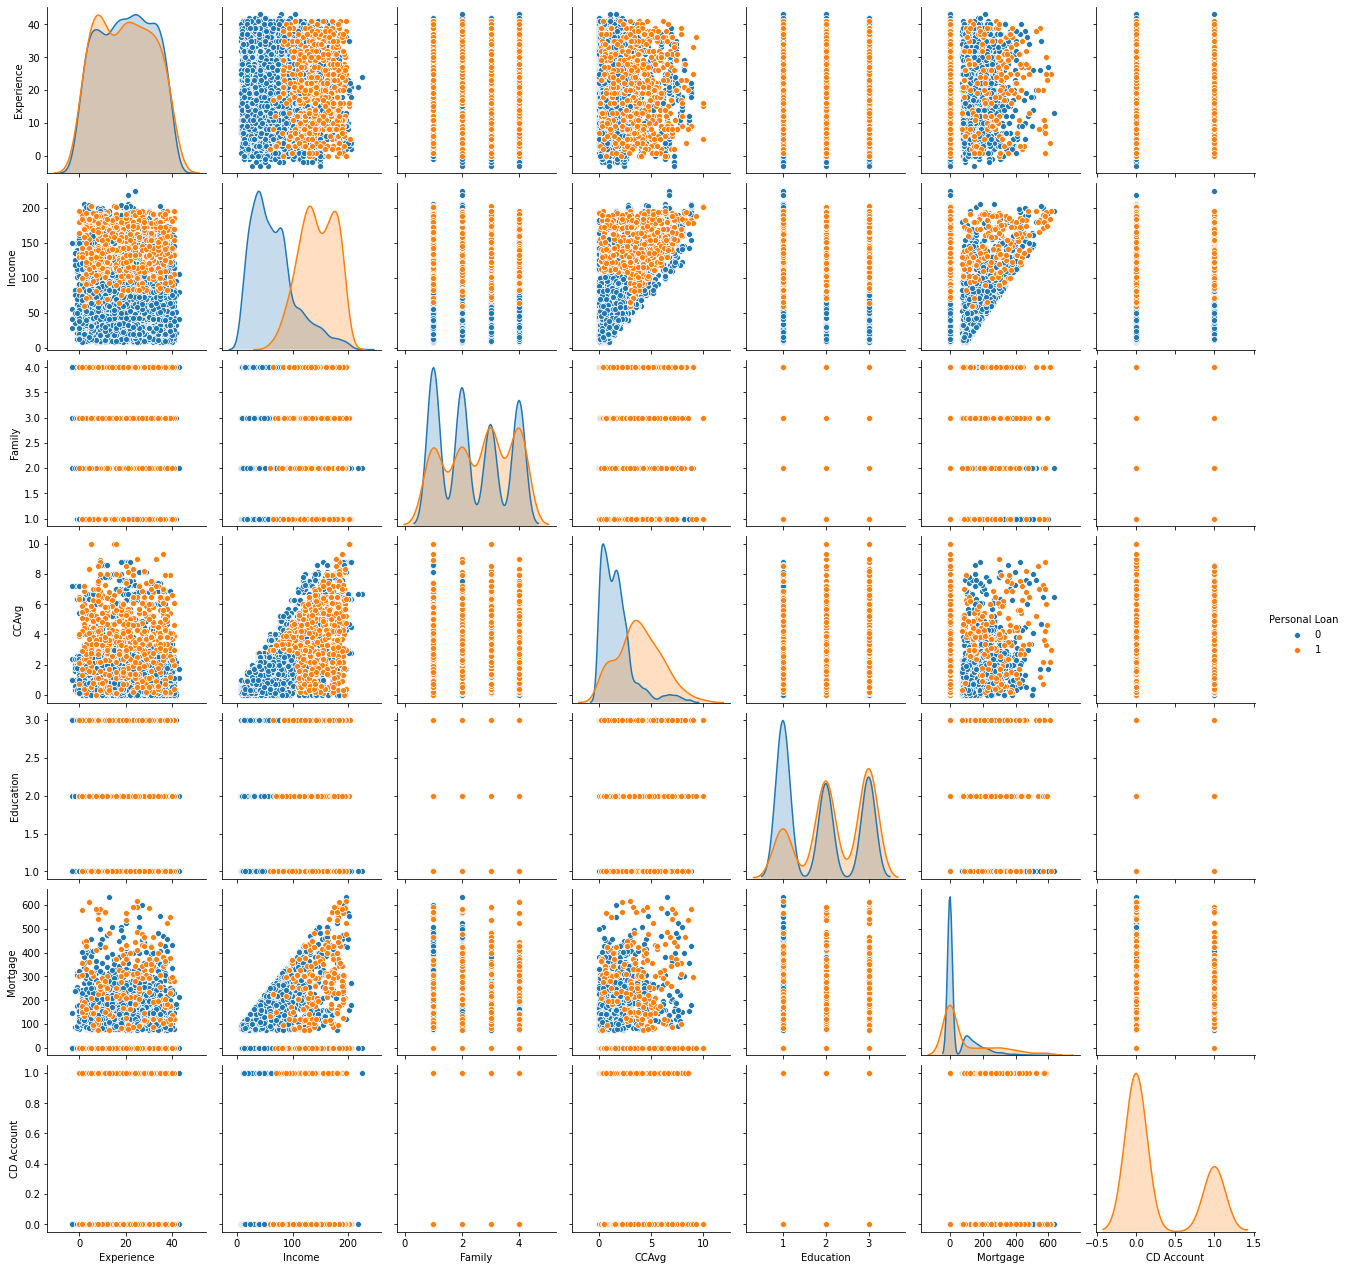

In [20]:
sns.pairplot(tbData1,hue='Personal Loan',diag_kind='kde')

# UNIVARIATE ANALYSIS : BOXPLOTS : Checking for outliers

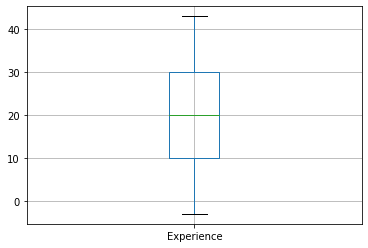

In [21]:
tbData1.boxplot(column=['Experience'])

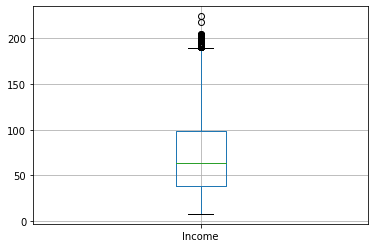

In [22]:
tbData1.boxplot(column=['Income'])

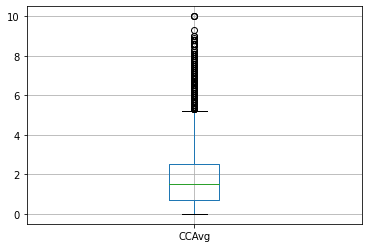

In [23]:
tbData1.boxplot(column=['CCAvg'])

# DUMMY VARIABLE

In [24]:
tbData1['Education']=tbData1['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Professional'})
tbData1 = pd.get_dummies(tbData1, columns=['Education'])
tbData1.head()


,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,CD Account,Education_Graduate,Education_Professional,Education_Undergrad
0,1,49,4,1.6,0,0,0,0,0,1
1,19,34,3,1.5,0,0,0,0,0,1
2,15,11,1,1.0,0,0,0,0,0,1
3,9,100,1,2.7,0,0,0,1,0,0
4,8,45,4,1.0,0,0,0,1,0,0


# HANDLING IMBALANCED DATA

In [25]:
tbData1['Personal Loan'].value_counts()

0    4456
1     480
Name: Personal Loan, dtype: int64

In [26]:
X = tbData1.drop(labels= "Personal Loan" , axis = 1)
y = tbData1["Personal Loan"]
X.head()

,Experience,Income,Family,CCAvg,Mortgage,CD Account,Education_Graduate,Education_Professional,Education_Undergrad
0,1,49,4,1.6,0,0,0,0,1
1,19,34,3,1.5,0,0,0,0,1
2,15,11,1,1.0,0,0,0,0,1
3,9,100,1,2.7,0,0,1,0,0
4,8,45,4,1.0,0,0,1,0,0


In [27]:
from scipy.stats import zscore
XScaled  = X.apply(zscore) 

XScaled.describe()

,Experience,Income,Family,CCAvg,Mortgage,CD Account,Education_Graduate,Education_Professional,Education_Undergrad
count,4.936000e+03,4.936000e+03,4.936000e+03,4.936000e+03,4.936000e+03,4.936000e+03,4.936000e+03,4.936000e+03,4.936000e+03
mean,1.253724e-16,1.166004e-16,-2.155668e-16,7.440474e-17,1.520934e-16,3.885106e-16,3.064359e-16,7.515598e-16,-5.773790e-16
std,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00
min,-2.017825e+00,-1.429394e+00,-1.215627e+00,-1.109219e+00,-5.602358e-01,-2.552851e-01,-6.226446e-01,-6.547168e-01,-8.519825e-01
25%,-8.831222e-01,-7.570833e-01,-1.215627e+00,-7.095412e-01,-5.602358e-01,-2.552851e-01,-6.226446e-01,-6.547168e-01,-8.519825e-01
50%,-1.027400e-02,-2.148972e-01,-3.438654e-01,-2.527667e-01,-5.602358e-01,-2.552851e-01,-6.226446e-01,-6.547168e-01,-8.519825e-01
75%,8.625742e-01,5.441632e-01,5.278962e-01,3.324756e-01,4.382386e-01,-2.552851e-01,1.606053e+00,1.527378e+00,1.173733e+00
max,1.997277e+00,3.255094e+00,1.399658e+00,4.600462e+00,5.655757e+00,3.917189e+00,1.606053e+00,1.527378e+00,1.173733e+00


In [28]:
from sklearn.model_selection import train_test_split

X = tbData1.drop('Personal Loan',axis=1)    
Y = tbData1['Personal Loan']   
x_train, x_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.3, random_state=1)

x_train.head()


,Experience,Income,Family,CCAvg,Mortgage,CD Account,Education_Graduate,Education_Professional,Education_Undergrad
3006,1.473568,2.062284,0.527896,1.745622,1.240934,3.917189,1.606053,-0.654717,-0.851982
110,-0.533983,-1.407707,0.527896,-0.538251,-0.560236,-0.255285,1.606053,-0.654717,-0.851982
3619,-0.010274,-0.692021,-1.215627,-0.937928,-0.560236,-0.255285,-0.622645,1.527378,-0.851982
4298,-0.097559,1.042974,-1.215627,-0.937928,-0.560236,-0.255285,-0.622645,-0.654717,1.173733
4172,1.909992,0.023665,1.399658,-1.052122,1.221356,-0.255285,1.606053,-0.654717,-0.851982


# SMOTE upsampling

In [29]:
from imblearn.over_sampling import SMOTE
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("Test  True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test  False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))


Before UpSampling, counts of label '1': 344
Before UpSampling, counts of label '0': 3111 

After UpSampling, counts of label '1': 3111
After UpSampling, counts of label '0': 3111 

After UpSampling, the shape of train_X: (6222, 9)
After UpSampling, the shape of train_y: (6222,) 

Test  True Values        : 136 (9.18%)
Test  False Values       : 1345 (90.82%)


#  DECISION TREE CLASSIFIER

In [30]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=1)

In [31]:
print(dTree.score(X_train_res, y_train_res))
print(dTree.score(x_test, y_test))

1.0
0.9810938555030385


In [32]:
###PRUNING TO MAX_DEPTH=3 FOR STUDY PURPOSE
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train_res, y_train_res)
print(dTreeR.score(X_train_res, y_train_res))
print(dTreeR.score(x_test, y_test))

0.9635165541626487
0.9351789331532748


In [33]:
# print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train_res.columns))

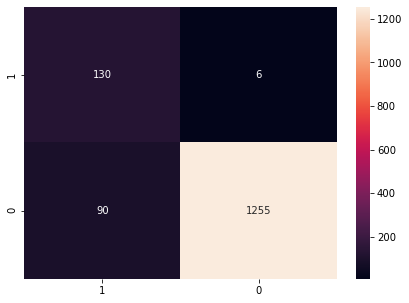

In [34]:
# print(dTreeR.score(x_test , y_test))
y_predict = dTreeR.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["1","0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g' )

#                             Ensemble Learning - Bagging

In [35]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train_res, y_train_res)


0.9858203916272789


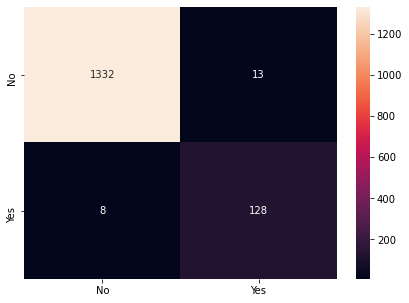

In [36]:
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


#                             Ensemble Learning - AdaBoosting

In [37]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train_res, y_train_res)


0.8966914247130318


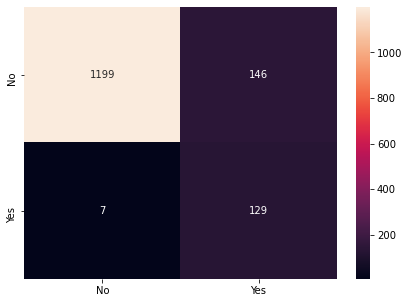

In [38]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


#                             Ensemble Learning - GradientBoost

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train_res, y_train_res)

0.9837947332883187


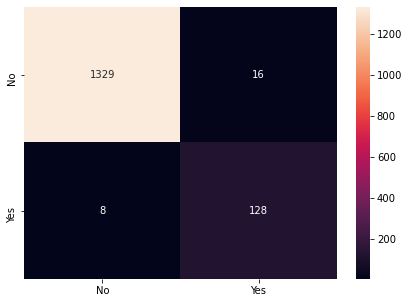

In [40]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#                             Ensemble Learning - XGBoost

In [42]:
from xgboost import XGBClassifier

In [43]:
xgbc=XGBClassifier(n_estimators = 50,random_state=1)

In [44]:

xgbc.fit(X_train_res, y_train_res)
y_pred = xgbc.predict(x_test)
print(xgbc.score(x_test , y_test))

[18:21:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9885212694125591


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


#                             Ensemble Learning - LightGBMBoost

In [45]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [46]:
from lightgbm import LGBMClassifier
lgmc=LGBMClassifier(n_estimators = 50,random_state=1)
lgmc.fit(X_train_res, y_train_res)
y_pred = lgmc.predict(x_test)
print(lgmc.score(x_test , y_test))


0.9844699527346388


#                             Ensemble Learning - CATBoost

In [47]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [48]:
from catboost import CatBoostRegressor
cb=CatBoostRegressor(n_estimators = 50,random_state=1)
cb.fit(X_train_res, y_train_res)
y_pred = cb.predict(x_test)
print(cb.score(x_test , y_test))

Learning rate set to 0.5
0:	learn: 0.2806100	total: 123ms	remaining: 6.04s
1:	learn: 0.1823841	total: 126ms	remaining: 3.03s
2:	learn: 0.1419092	total: 129ms	remaining: 2.02s
3:	learn: 0.1251399	total: 132ms	remaining: 1.51s
4:	learn: 0.1175057	total: 134ms	remaining: 1.21s
5:	learn: 0.1127691	total: 137ms	remaining: 1s
6:	learn: 0.1100693	total: 139ms	remaining: 856ms
7:	learn: 0.1075396	total: 142ms	remaining: 745ms
8:	learn: 0.1041438	total: 144ms	remaining: 658ms
9:	learn: 0.1026104	total: 147ms	remaining: 588ms
10:	learn: 0.1014445	total: 150ms	remaining: 530ms
11:	learn: 0.0999546	total: 151ms	remaining: 480ms
12:	learn: 0.0989931	total: 154ms	remaining: 437ms
13:	learn: 0.0979655	total: 156ms	remaining: 400ms
14:	learn: 0.0955689	total: 158ms	remaining: 368ms
15:	learn: 0.0930089	total: 160ms	remaining: 341ms
16:	learn: 0.0915536	total: 163ms	remaining: 316ms
17:	learn: 0.0910487	total: 165ms	remaining: 293ms
18:	learn: 0.0880357	total: 167ms	remaining: 273ms
19:	learn: 0.086935

# Ensemble RandomForest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=9)
rfcl = rfcl.fit(X_train_res, y_train_res)

0.986495611073599


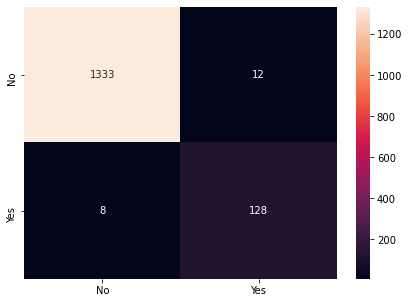

In [50]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# CONCLUSION

Since this is an user-defined prediction problem,we prefer the XG boost model which has a good performance to predict whether the customer will buy a personal loan or not.